<a href="https://colab.research.google.com/github/ZaietsMykytaFIT/DTEU-Machine-Learning-2025-Zaiets/blob/main/Zaiets_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [95]:
uploaded = files.upload()

#Частина з аналізом#

In [96]:
df = pd.read_csv('house_price_regression_dataset.csv')
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


1. Square_Footage - The total interior living space of the house in square [ft or m].
2. Num_Bedrooms - The number of bedrooms in the house.
3. Num_Bathrooms - The number of bathrooms in the house.
4. The year the house was constructed.
5. Lot_Size refers to the total square footage or precise area of a plot of land.
6. The size of the garage, likely measured by the number of vehicles it can accommodate.
7. A numerical rating representing the overall quality of the neighborhood (e.g., based on amenities, crime rate, school quality, etc.).
8. The market price or sale price of the house, likely in dollars.

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


In [98]:
df.duplicated().sum()

np.int64(0)

In [99]:
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [100]:
df['Neighborhood_Quality'].value_counts()

,count
Neighborhood_Quality,
10,123
5,109
2,105
7,102
6,101
4,99
8,97
1,91
9,88


In [101]:
df['Num_Bathrooms'].value_counts()

,count
Num_Bathrooms,
1,350
2,327
3,323


In [102]:
#sns.pairplot(df)

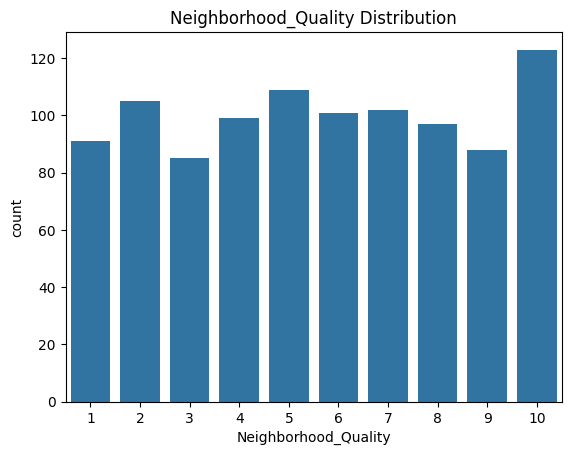

In [103]:
sns.countplot(x='Neighborhood_Quality', data=df)
plt.title('Neighborhood_Quality Distribution')
plt.show()

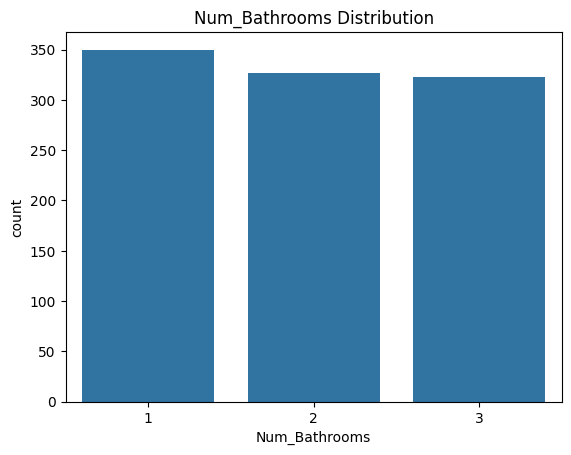

In [104]:
sns.countplot(x='Num_Bathrooms', data=df)
plt.title('Num_Bathrooms Distribution')
plt.show()

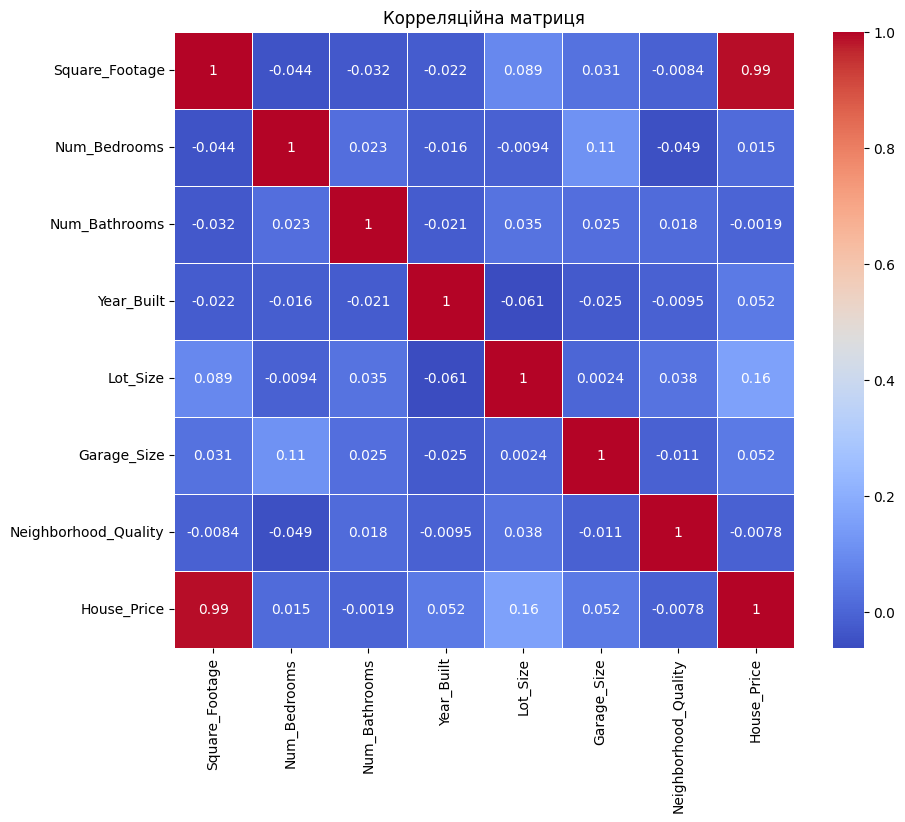

In [105]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляційна матриця')
plt.show()

In [106]:
correlation_with_class = correlation_matrix['House_Price'].sort_values(ascending=False)
correlation_with_class

,House_Price
House_Price,1.000000
Square_Footage,0.991261
Lot_Size,0.160412
Garage_Size,0.052133
Year_Built,0.051967
Num_Bedrooms,0.014633
Num_Bathrooms,-0.001862
Neighborhood_Quality,-0.007770


#Частина з регресією#

In [107]:
X = df.drop(columns=['House_Price'])
y = df['House_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# колись зробити скейл "y" для виправлення погрішності MAE & MSE

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model                R²         MAE        MSE       
--------------------------------------------------
Linear Regression    0.99843      8174.58     101434798.51
Ridge                0.99841      8241.59     102480990.01
Lasso                0.99843      8174.75     101436558.18
Random Forest        0.99388      16109.34     394754769.82
Gradient Boosting    0.99651      12311.05     225085046.42


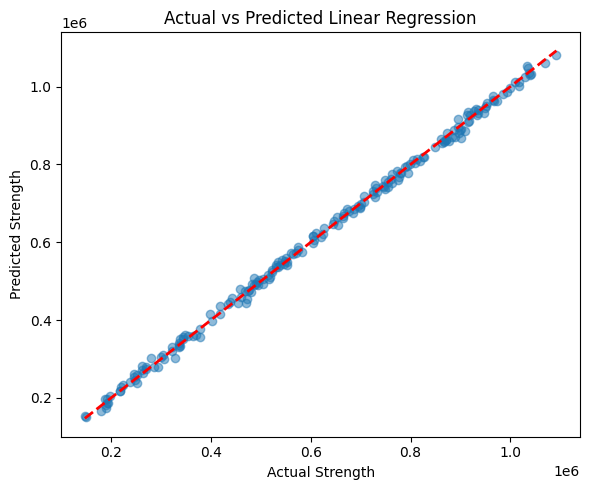

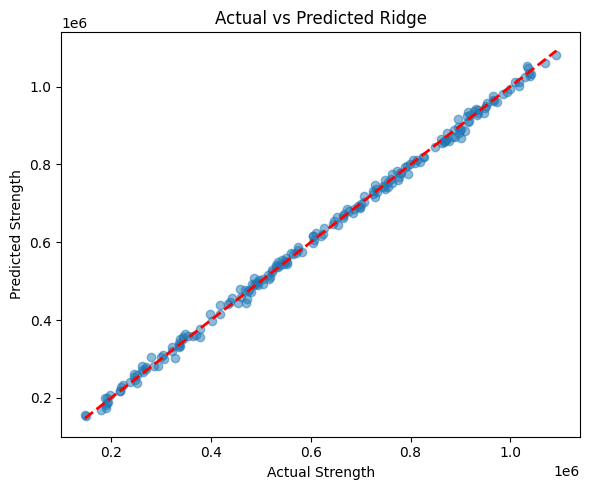

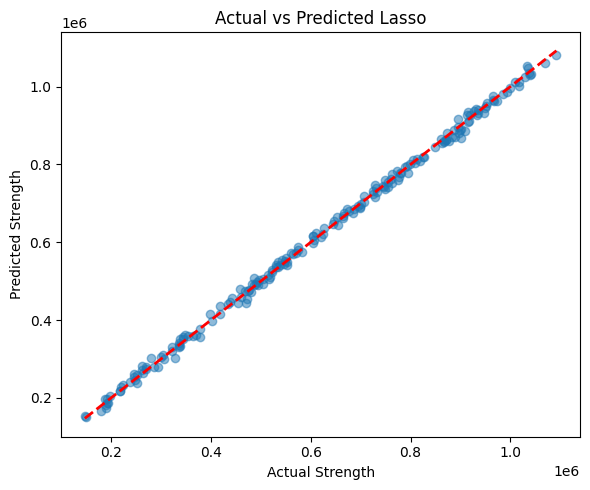

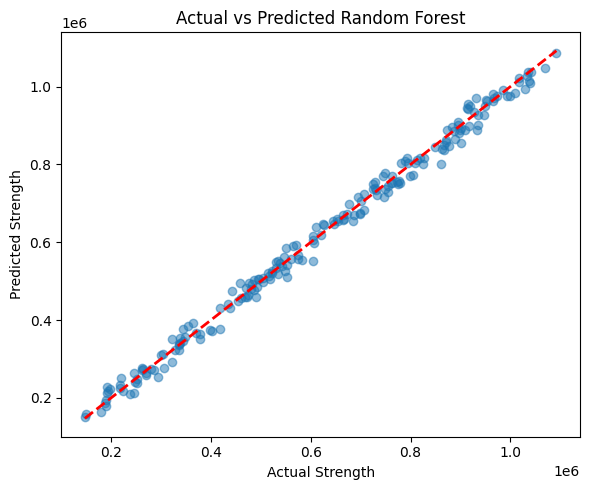

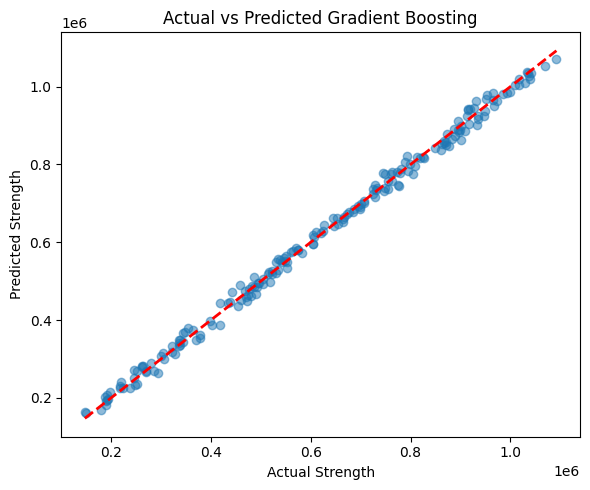

In [113]:
# Моделі, їх метрика та графіки
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

print(f"{'Model':<20} {'R²':<10} {'MAE':<10} {'MSE':<10}")
print("-" * 50)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name:<20} {r2:.5f}      {mae:.2f}     {mse:.2f}")

    plt.figure(figsize=(6, 5))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted {name}')
    plt.xlabel('Actual Strength')
    plt.ylabel('Predicted Strength')
    plt.tight_layout()

plt.show()

In [118]:
param_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

In [119]:
rf_reg_gs = RandomForestRegressor(random_state=42)
rf_search = GridSearchCV(estimator=rf_reg_gs, param_grid = param_rf, cv=3)
rf_search.fit(X_train, y_train)
best_rf_params = rf_search.best_params_

In [120]:
best_rf_params

{'max_depth': None,
 'max_features': None,
 'min_samples_split': 2,
 'n_estimators': 100}

In [121]:
rf_optimal = RandomForestRegressor(**best_rf_params, random_state=42)
rf_optimal.fit(X_train, y_train)
y_pred_rf_optimal = rf_optimal.predict(X_test)

In [123]:
# Розрахунки для тестових даних
rf_mse = mean_squared_error(y_test, y_pred_rf_optimal )
rf_mae = mean_absolute_error(y_test, y_pred_rf_optimal )
rf_r2 = r2_score(y_test, y_pred_rf_optimal )

In [124]:
print("MSE:", rf_mse)
print("MAE:", rf_mae)
print("R2:", rf_r2)
# підбір параментрів нам не допоміг, адже MSE & MAE стали більшими

MSE: 394154497.04130006
MAE: 16106.272200602853
R2: 0.9938851770748258


Висновок:
У цій роботі було:
завантажено датасет про ціни нерухомості,
перевірено датасет на копії,
створено матрицю кореляції, що показала пряму залежність площі та ціни,
було підготовлено дані для побудови регресійних моделей на основі найбільш корелюючих ознак - "ціна будинку", масштабувавши ознаки та поділивши дані на тренувальну та тестову вибірки,
знайдено коеф. детермінації і середньоквадратичну помилку,
побудовано графіки зі справжніми та прогнозованими значеннями,
та були спроби підбору значень для моделі Random Forest, без значних успіхів у підвищені точності.
Отже, "Лінійна регреійна" та "Лассо" моделі найточніше передбачають ціни на нерухомість за цим датасетом.